In [30]:
import pandas as pd
import re
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import f1_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.decomposition import PCA






In [31]:
from warnings import simplefilter

# ignore all warnings
simplefilter(action='ignore')

In [32]:
trainData = pd.read_csv("TrainingDataMulti.csv", sep=",",header=None)
testData = pd.read_csv("TestingDataMulti.csv", sep=",",header=None)

In [33]:
df_train = pd.DataFrame(data = trainData)
df_test = pd.DataFrame(data = testData)

In [34]:
X_train, X_test, y_train, y_test = train_test_split(df_train.iloc[:,:-1],df_train.iloc[:,-1], test_size=0.2, random_state=42
)
X_train.shape


(4800, 128)

In [35]:
pipe =  RandomForestClassifier()
pipe.fit(X_train, y_train)


# Finally, we can evaluate the model's performance on the test set
SVM_accuracy = pipe.score(X_test, y_test)
print("Test set accuracy: {:.2f}".format(SVM_accuracy)) 

Test set accuracy: 0.95


In [36]:
feature_importances = pipe.feature_importances_

In [37]:
import numpy as np

# Example array
arr = pipe.feature_importances_

# Retrieve the indices of the 10 highest values
indices = np.argsort(-arr)[:20]

# Print the indices
print(indices)


[ 90 100  81   3  92 114 110  27  85  56  52  88  23  50  79  34  30  68
   4 108]


In [38]:
X_train, X_test, y_train, y_test = train_test_split(df_train.iloc[:,indices],df_train.iloc[:,-1], test_size=0.2, random_state=42
)
X_train.shape

(4800, 20)

In [39]:
pipe =  RandomForestClassifier()
pipe.fit(X_train, y_train)


# Finally, we can evaluate the model's performance on the test set
SVM_accuracy = pipe.score(X_test, y_test)
print("Test set accuracy: {:.2f}".format(SVM_accuracy))

Test set accuracy: 0.90


In [42]:
X_train=df_train.iloc[:,indices]
y_train=df_train.iloc[:,-1]
X_test=pd.DataFrame(data = testData).iloc[:,indices]

In [44]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
print(rfc.score(X_train,y_train))

1.0


In [45]:
preds = rfc.predict(X_test)

In [46]:
preds

array([2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1,
       2, 2, 2, 2, 2, 0, 0, 2, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 1, 2, 0, 0,
       2, 2, 2, 2, 2, 1, 2, 2, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2,
       2, 2, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0])

In [48]:
pps = rfc.predict_proba(X_test)

In [49]:
con = []
for y in pps:
    con.append(max(y))
avgCon = sum(con) / len(con)
print(con,sep=' ')
print("average confindence",avgCon)

[0.76, 0.5, 0.49, 0.51, 0.52, 0.58, 0.61, 0.6, 0.72, 0.76, 0.79, 0.89, 0.76, 0.73, 0.73, 0.7, 0.63, 0.54, 0.59, 0.43, 0.5, 0.45, 0.57, 0.53, 0.53, 0.55, 0.51, 0.51, 0.58, 0.57, 0.56, 0.52, 0.59, 0.96, 0.96, 0.95, 0.88, 0.95, 0.71, 0.58, 0.49, 0.55, 0.45, 0.46, 0.71, 0.7, 0.67, 0.58, 0.62, 0.52, 0.91, 0.54, 0.52, 0.6, 0.8, 0.58, 0.55, 0.57, 0.89, 0.8, 0.75, 0.66, 0.68, 0.59, 0.42, 0.44, 1.0, 0.44, 0.91, 0.97, 0.98, 0.99, 0.99, 1.0, 1.0, 0.86, 0.84, 0.98, 0.93, 0.94, 0.97, 0.97, 0.58, 0.99, 0.4, 0.46, 0.4, 0.39, 0.4, 0.52, 0.45, 0.47, 0.67, 0.69, 0.63, 0.87, 0.84, 0.97, 0.97, 0.96]
average confindence 0.6827999999999997


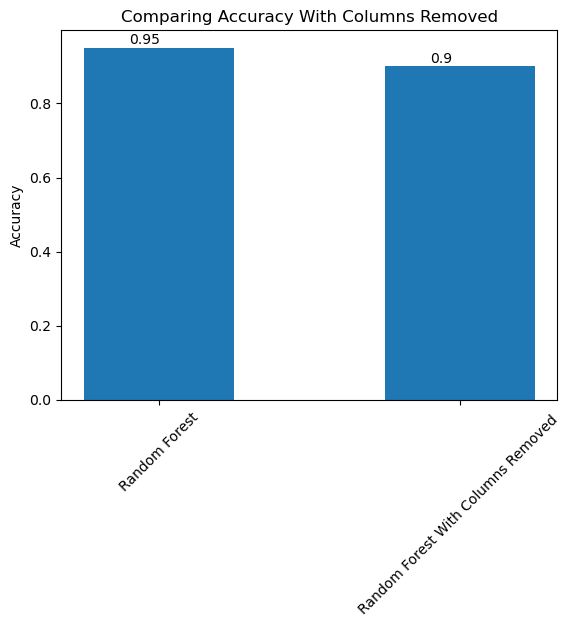

In [50]:
x_axis = ["Random Forest", "Random Forest With Columns Removed "]
y_axis = [0.95,0.90]
plt.bar(x_axis, y_axis, width = 0.5)
plt.title('Comparing Accuracy With Columns Removed' )
plt.ylabel('Accuracy')
for i, v in enumerate(y_axis):
    plt.text(i-0.1, v+0.01, "{:.3}".format(v))
plt.xticks(rotation=45)
plt.show()

In [104]:
def generateData():
    colNum = 128
    xs = []
    accuracies = []
    confidences = []
    X_Full=df_train.iloc[:,:-1]
    y_Full=df_train.iloc[:,-1]
    rfc = RandomForestClassifier()
    rfc.fit(X_Full,y_Full)
    indicies = rfc.feature_importances_
    indicies = np.argsort(indicies)
    X_TestSet =pd.DataFrame(data = testData)
    X_train, X_test, y_train, y_test = train_test_split(df_train.iloc[:,:-1],df_train.iloc[:,-1], test_size=0.2, random_state=42)
    for i in range(128):
        rfc = RandomForestClassifier()
        rfc.fit(X_train.iloc[:,indicies[:i+1]],y_train)
        ac= rfc.score(X_test.iloc[:,indicies[:i+1]],y_test)
        accuracies.append(ac) 
#         print("Completed Run",i)
#         print("Accuracy is", ac)
        rfc = RandomForestClassifier()
        rfc.fit(X_Full.iloc[:,indicies[:i+1]],y_Full)
        pps = rfc.predict_proba(X_TestSet.iloc[:,indicies[:i+1]])
        con = []
        for y in pps:
            con.append(max(y))
        avgCon = sum(con) / len(con)
#         print("average confindence",avgCon)
        confidences.append(avgCon)
    return  accuracies , confidences
        
        
        
        
        
        
        
        

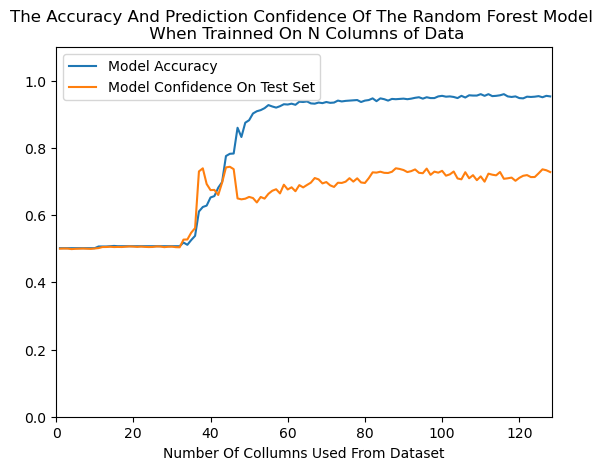

In [106]:
acc , con = generateData()
x_axis = [i+1  for i in range(128)]

plt.plot(x_axis,acc,label="Model Accuracy")
plt.plot(x_axis,con,label="Model Confidence On Test Set")
plt.legend(loc='upper left')
plt.title('The Accuracy And Prediction Confidence Of The Random Forest Model \n When Trainned On N Columns of Data')
plt.xlabel('Number Of Collumns Used From Dataset')
plt.xlim([0, 128.5])
plt.ylim([0, 1.1])
plt.show()